In [168]:

import csv
import time

import numpy as np
import pandas as pd
from numpy.random import rand
from sklearn.model_selection import train_test_split  # used only for train test splitting
import matplotlib.pyplot as plt
from sklearn import preprocessing



In [194]:
df = pd.read_csv("ex2data1.txt")
# storing this dataframe in a csv file
df.to_csv('ex2data1.csv', index = None)
data=pd.read_csv('ex2data1.csv',names= ["Exam 1","Exam 2", "Admission"])
data




,Exam 1,Exam 2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [195]:

# set X (training data) and y (target variable)
#cols = data.shape[1]
#X = data.iloc[:,0:cols-1]
#y = data.iloc[:,cols-1:cols]

data[['Exam 1','Exam 2']] = (data[['Exam 1','Exam 2']] - data[['Exam 1','Exam 2']].mean()) / (data[['Exam 1','Exam 2']].max())
X = data[['Exam 1','Exam 2']]
y = data['Admission']




X.insert(0, 'Ones', 1)

print(X,y)




# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
y = y.reshape(100,1)
theta = np.zeros(3)
data

    Ones    Exam 1    Exam 2
0      1 -0.310741  0.119377
1      1 -0.354185 -0.225823
2      1 -0.298482  0.067566
3      1 -0.054711  0.203162
4      1  0.134115  0.092267
..   ...       ...       ...
95     1  0.178757 -0.180457
96     1 -0.234229  0.211206
97     1  0.337288  0.025826
98     1 -0.103220 -0.013048
99     1  0.091474  0.235743

[100 rows x 3 columns] 0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: Admission, Length: 100, dtype: int64


,Exam 1,Exam 2,Admission
0,-0.310741,0.119377,0
1,-0.354185,-0.225823,0
2,-0.298482,0.067566,0
3,-0.054711,0.203162,1
4,0.134115,0.092267,1
...,...,...,...
95,0.178757,-0.180457,1
96,-0.234229,0.211206,1
97,0.337288,0.025826,1
98,-0.103220,-0.013048,1


In [ ]:

# add a ones column - this makes the matrix multiplication work out easier




In [196]:
print(X,y,theta)

[[ 1.         -0.31074106  0.11937658]
 [ 1.         -0.35418534 -0.22582308]
 [ 1.         -0.29848247  0.06756588]
 [ 1.         -0.05471093  0.20316242]
 [ 1.          0.13411549  0.09226692]
 [ 1.         -0.20596452 -0.10018896]
 [ 1.         -0.04545434  0.30635785]
 [ 1.          0.09396647 -0.19892886]
 [ 1.          0.1047254   0.21440976]
 [ 1.          0.18820945 -0.22948047]
 [ 1.          0.30269387 -0.2831686 ]
 [ 1.          0.09385541 -0.36026032]
 [ 1.          0.16691512  0.10377287]
 [ 1.          0.0372673   0.31856856]
 [ 1.         -0.26150952  0.09927044]
 [ 1.         -0.11693351  0.23248188]
 [ 1.          0.03431778 -0.13635689]
 [ 1.          0.02306552 -0.19766902]
 [ 1.          0.05025887  0.27010511]
 [ 1.          0.11354055 -0.1885925 ]
 [ 1.          0.01730733 -0.23650949]
 [ 1.          0.24073943 -0.00427465]
 [ 1.         -0.1513554  -0.17564768]
 [ 1.         -0.31486414 -0.2226418 ]
 [ 1.          0.12300993  0.02781812]
 [ 1.         -0.03379077

In [197]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

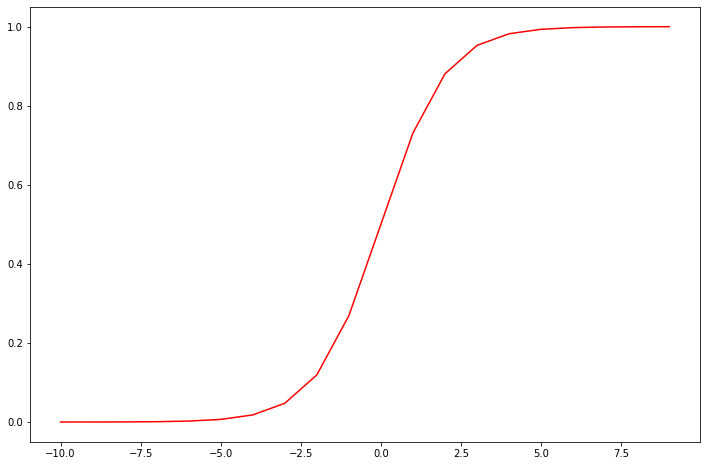

In [198]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [199]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(np.dot(X ,theta.T))))
    second = np.multiply((1 - y), np.log(1 - sigmoid(np.dot(X ,theta.T))))
    return np.sum(first - second) / (len(X))


In [200]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [201]:
cost(theta, X, y)

0.6931471805599453

In [202]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(np.dot(X,theta.T)) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [203]:
gradient(theta, X, y)

array([-0.1       , -0.05454178, -0.04693708])

import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

theta = result[0]
theta

cost(result[0], X, y)


In [205]:
lr = 0.1
iterations = 1000
parameters = 3
theta = np.zeros(parameters)


for i in range(iterations):

    gradients = gradient(theta,X,y)
    theta = theta - (lr * gradients)


    #print("Error in iteration "+ str(i) + ": " + str(cost(theeta,X_train,Y_train)))


print(theta)

[0.4787186  3.72816999 3.30525167]


In [206]:
x_values = X[:,1]
np.multiply(theta[1] , x_values)

array([-1.1584955 , -1.32046314, -1.11279338, -0.20397164,  0.50000534,
       -0.76787073, -0.16946151,  0.35032298,  0.3904341 ,  0.70167681,
        1.12849422,  0.34990892,  0.62228796,  0.13893883, -0.97495193,
       -0.43594801,  0.1279425 ,  0.08599218,  0.18737362,  0.42329846,
        0.06452466,  0.89751752, -0.56427868, -1.17386706,  0.45860191,
       -0.12597774,  0.54323126,  1.02589858, -0.14244014, -1.00305611,
       -0.15928006,  0.73796589, -0.50552629, -0.50786321, -0.94886372,
       -0.41114828, -1.18494241, -0.05479721,  0.34152827, -1.17492846,
        0.68186752, -0.52644973,  1.07553061,  0.62459222, -0.54512155,
       -0.12778297,  0.43129989,  1.19982671, -0.13337038,  0.96803417,
        0.53406794,  1.25588033,  0.93000623, -1.16219819, -0.57355139,
       -0.59968682,  1.19512241, -1.23492255,  0.32134047,  0.22975954,
        0.36417333, -1.13375553, -0.35069588, -1.32897385, -0.78336991,
        0.0342321 , -0.94062306, -0.61888692,  0.54656974,  0.04

In [207]:

x_values = X[:,1]
y_values = (theta[0] + (np.multiply(theta[1] , x_values))) / ( -theta[2])

print(x_values,y_values)

[-0.31074106 -0.35418534 -0.29848247 -0.05471093  0.13411549 -0.20596452
 -0.04545434  0.09396647  0.1047254   0.18820945  0.30269387  0.09385541
  0.16691512  0.0372673  -0.26150952 -0.11693351  0.03431778  0.02306552
  0.05025887  0.11354055  0.01730733  0.24073943 -0.1513554  -0.31486414
  0.12300993 -0.03379077  0.1457099   0.27517484 -0.03820645 -0.26904785
 -0.04272339  0.1979432  -0.13559636 -0.13622319 -0.25451193 -0.11028153
 -0.31783487 -0.01469815  0.09160748 -0.31514884  0.18289604 -0.14120862
  0.28848755  0.16753319 -0.14621692 -0.03427498  0.11568675  0.32182725
 -0.03577368  0.25965398  0.14325204  0.33686241  0.24945382 -0.31173423
 -0.15384261 -0.16085286  0.32056543 -0.33124094  0.08619255  0.06162797
  0.09768153 -0.30410511 -0.09406649 -0.35646815 -0.21012183  0.00918201
 -0.25230155 -0.16600287  0.14660537  0.01104346 -0.3297821  -0.01607721
  0.06713777 -0.05195332 -0.06815049  0.3424253  -0.18411699 -0.15212301
 -0.05197665  0.16610982  0.23309748  0.29240568  0

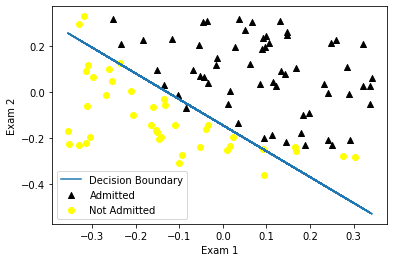

In [209]:



plt.plot(x_values, y_values, label='Decision Boundary')

plt.scatter(data['Exam 1'][(data.Admission == 1) ],data['Exam 2'][(data.Admission == 1) ],
           marker='^',
           color='black',
           label='Admitted')
plt.scatter(data['Exam 1'][(data.Admission == 0) ],data['Exam 2'][(data.Admission == 0) ],
           marker='o',
           color='yellow',
           label='Not Admitted')

plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend()
plt.show()

